# ICLR Review Scores Visualization

This notebook reads ICLR review data and creates scatter plots showing Rigor vs Appeal, colored by submission status.


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10


In [2]:
# Read the CSV data
data_path = Path('data/ICLR_reviews_data.csv')
df = pd.read_csv(data_path)

print(f"Loaded {len(df)} reviews")
print(f"\nDataFrame Info:")
df.info()
print(f"\nFirst few rows:")
print(df.head())
print(f"\nStatus distribution:")
print(df['status'].value_counts())


Loaded 89284 reviews

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89284 entries, 0 to 89283
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   conference     89284 non-null  object 
 1   submission_id  89284 non-null  object 
 2   review_id      89284 non-null  object 
 3   soundness      46748 non-null  float64
 4   presentation   46748 non-null  float64
 5   contribution   46748 non-null  float64
 6   rating         74776 non-null  float64
 7   confidence     74776 non-null  float64
 8   status         89284 non-null  object 
dtypes: float64(5), object(4)
memory usage: 6.1+ MB

First few rows:
  conference submission_id   review_id  soundness  presentation  contribution  \
0   ICLR2024    zzR1Uskhj0  Upm4GL7iRr        NaN           NaN           NaN   
1   ICLR2024    zzR1Uskhj0  PUauntqQsB        NaN           NaN           NaN   
2   ICLR2024    zzR1Uskhj0  NLfuL11uwO        NaN         

# (MAKE YOUR CHANGES HERE) 
## Define Custom Functions for Rigor and Appeal

You can modify these functions to calculate Rigor and Appeal differently. The default is a simple average of available scores.

In [3]:
def calculate_rigor(soundness, presentation, contribution, rating, confidence):
    """
    Calculate Rigor score from review metrics.
    Default: Simple average of soundness, contribution, and rating.
    
    Parameters:
    -----------
    soundness : float or NaN
    presentation : float or NaN
    contribution : float or NaN
    rating : float or NaN
    confidence : float or NaN
    
    Returns:
    --------
    float : Rigor score
    """

    # CHANGE HERE
    return soundness*0.98 + contribution*0.01 + presentation*0.01


def calculate_appeal(soundness, presentation, contribution, rating, confidence):
    """
    Calculate Appeal score from review metrics.
    Default: Simple average of presentation, contribution, and rating.
    
    Parameters:
    -----------
    soundness : float or NaN
    presentation : float or NaN
    contribution : float or NaN
    rating : float or NaN
    confidence : float or NaN
    
    Returns:
    --------
    float : Appeal score
    """
    # CHANGE HERE
    return contribution*0.98 + presentation*0.01 + soundness*0.01


## Calculate Rigor and Appeal for All Reviews


In [4]:
# Apply the calculation functions to each row
df['rigor'] = df.apply(
    lambda row: calculate_rigor(
        row['soundness'],
        row['presentation'],
        row['contribution'],
        row['rating'],
        row['confidence']
    ), axis=1
)

df['appeal'] = df.apply(
    lambda row: calculate_appeal(
        row['soundness'],
        row['presentation'],
        row['contribution'],
        row['rating'],
        row['confidence']
    ), axis=1
)

print(f"Calculated Rigor and Appeal scores")
print(f"Rigor range: {df['rigor'].min():.2f} to {df['rigor'].max():.2f}")
print(f"Appeal range: {df['appeal'].min():.2f} to {df['appeal'].max():.2f}")
print(f"\nReviews with valid Rigor: {df['rigor'].notna().sum()}")
print(f"Reviews with valid Appeal: {df['appeal'].notna().sum()}")


Calculated Rigor and Appeal scores
Rigor range: 1.00 to 4.00
Appeal range: 1.00 to 4.00

Reviews with valid Rigor: 46748
Reviews with valid Appeal: 46748


In [5]:
df

,conference,submission_id,review_id,soundness,presentation,contribution,rating,confidence,status,rigor,appeal
0,ICLR2024,zzR1Uskhj0,Upm4GL7iRr,NaN,NaN,NaN,5.0,4.0,Withdrawn,NaN,NaN
1,ICLR2024,zzR1Uskhj0,PUauntqQsB,NaN,NaN,NaN,5.0,4.0,Withdrawn,NaN,NaN
2,ICLR2024,zzR1Uskhj0,NLfuL11uwO,NaN,NaN,NaN,3.0,4.0,Withdrawn,NaN,NaN
3,ICLR2024,zzR1Uskhj0,wKVoAVtxek,NaN,NaN,NaN,5.0,4.0,Withdrawn,NaN,NaN
4,ICLR2024,zzR1Uskhj0,aU4SaZOeh4,NaN,NaN,NaN,6.0,2.0,Withdrawn,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
89279,ICLR2025,zzR1Uskhj0,zpboemkkjR,NaN,NaN,NaN,NaN,NaN,accept,NaN,NaN
89280,ICLR2025,zzR1Uskhj0,r8ZflFk3T7,4.0,3.0,4.0,8.0,4.0,accept,3.99,3.99
89281,ICLR2025,zzR1Uskhj0,GMsjHLXdOx,4.0,3.0,3.0,8.0,3.0,accept,3.98,3.01
89282,ICLR2025,zzR1Uskhj0,i3QgWgrJff,2.0,3.0,3.0,6.0,4.0,accept,2.02,2.99


## Create Scatter Plot for Selected Year


In [6]:
# Select year to plot
selected_year = 'ICLR2025'  # Change this to 'ICLR2024' or 'ICLR2025'

# Filter data for selected year
df_year = df[df['conference'] == selected_year].copy()

# Remove rows with missing Rigor or Appeal
df_plot = df_year.dropna(subset=['rigor', 'appeal'])

print(f"Plotting {len(df_plot)} reviews for {selected_year}")
print(f"\nStatus distribution:")
print(df_plot['status'].value_counts())


Plotting 46748 reviews for ICLR2025

Status distribution:
status
reject         20396
accept         14955
Withdrawn      11361
Desk Reject       36
Name: count, dtype: int64


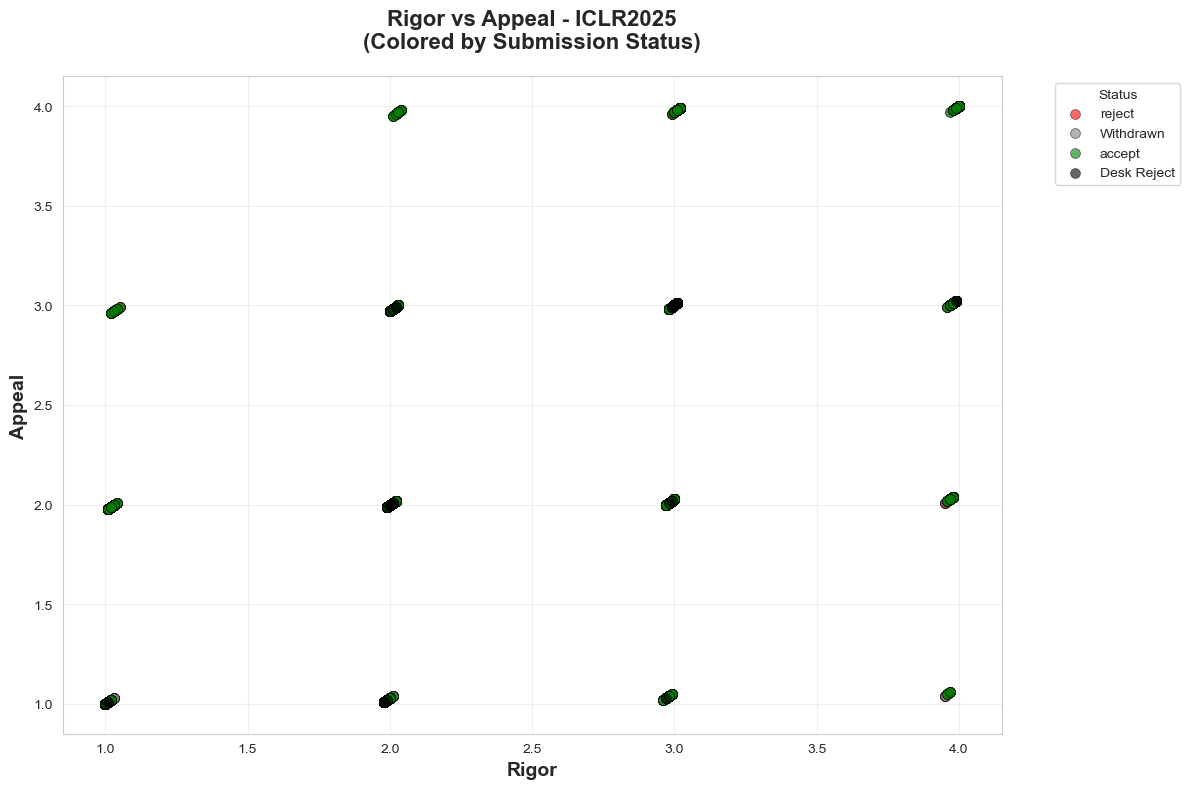


Plot created with 46748 data points

Color mapping:
  reject: red
  Withdrawn: grey
  accept: green
  Desk Reject: black


In [7]:
# Define custom color map for statuses
def get_status_color(status):
    """Get color for a given status."""
    status_lower = str(status).lower()
    if 'reject' in status_lower and 'desk' not in status_lower:
        return 'red'
    elif 'accept' in status_lower:
        return 'green'
    elif 'withdrawn' in status_lower:
        return 'grey'
    elif 'desk' in status_lower and 'reject' in status_lower:
        return 'black'
    else:
        # Default color for unknown statuses
        return 'blue'

# Create color map for all statuses in the data
statuses = df_plot['status'].unique()
color_map = {status: get_status_color(status) for status in statuses}

# Create scatter plot with custom colors
fig, ax = plt.subplots(figsize=(12, 8))

# Plot each status with custom color
for status in statuses:
    status_data = df_plot[df_plot['status'] == status]
    ax.scatter(
        status_data['rigor'],
        status_data['appeal'],
        label=status,
        color=color_map[status],
        alpha=0.6,
        s=50,
        edgecolors='black',
        linewidths=0.5
    )

# Customize plot
ax.set_xlabel('Rigor', fontsize=14, fontweight='bold')
ax.set_ylabel('Appeal', fontsize=14, fontweight='bold')
ax.set_title(f'Rigor vs Appeal - {selected_year}\n(Colored by Submission Status)', 
             fontsize=16, fontweight='bold', pad=20)
ax.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nPlot created with {len(df_plot)} data points")
print(f"\nColor mapping:")
for status, color in color_map.items():
    print(f"  {status}: {color}")


## Optional: Create Separate Plots for Each Status

This creates individual subplots for each status type.


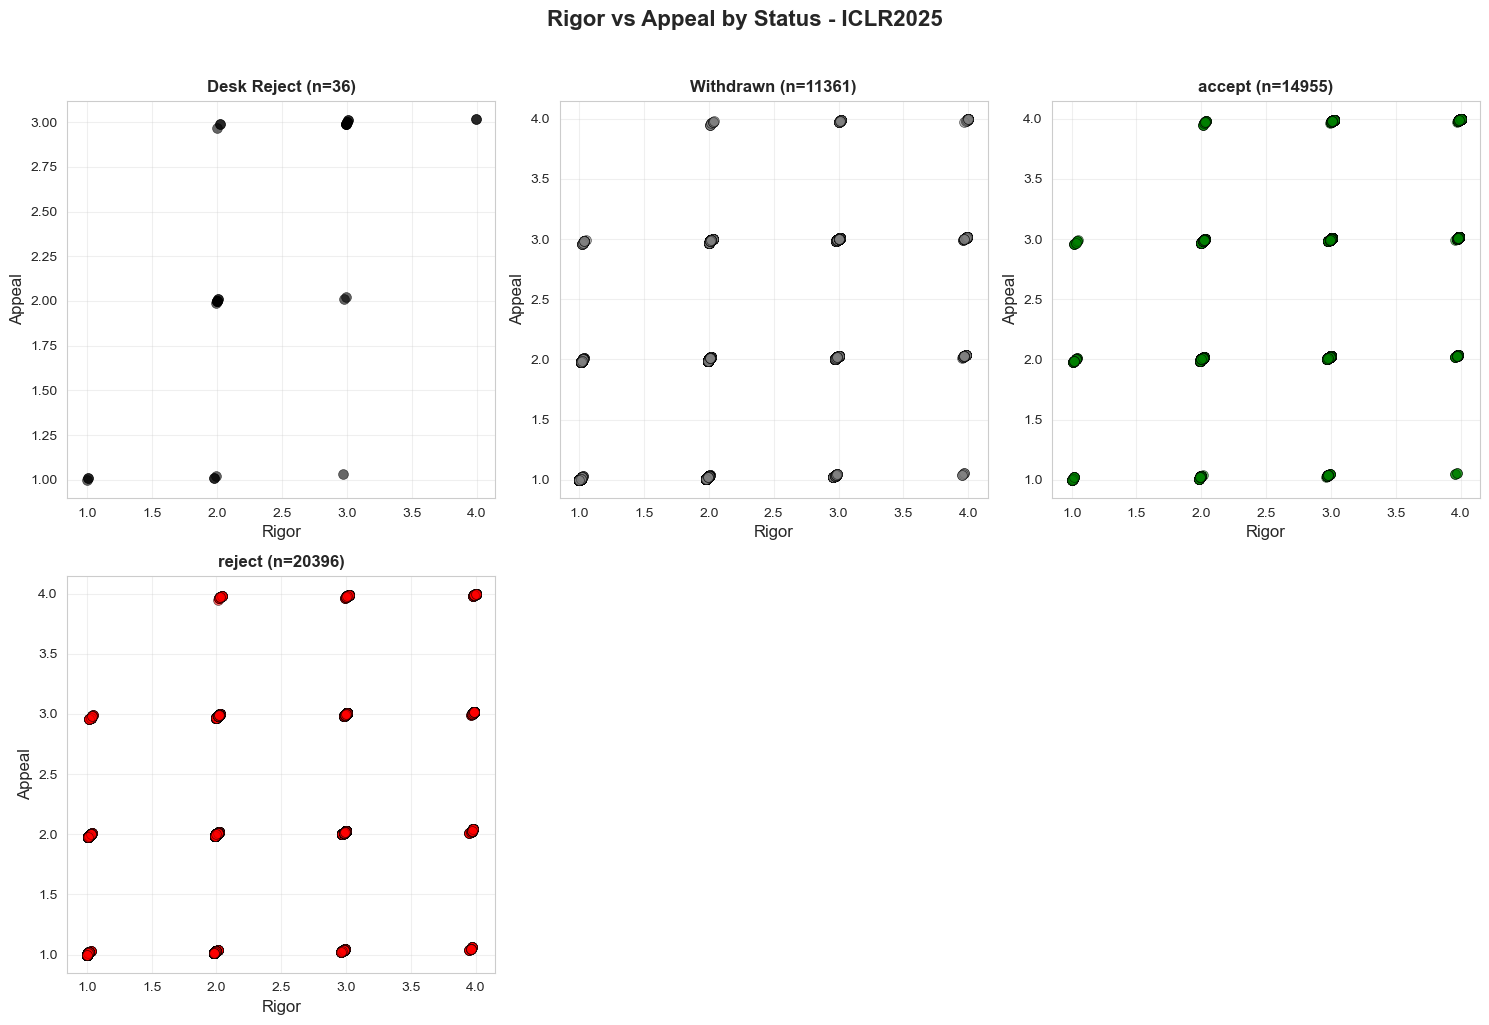

In [8]:
# Create subplots for each status
statuses = sorted(df_plot['status'].unique())
n_statuses = len(statuses)

# Calculate grid dimensions
n_cols = 3
n_rows = (n_statuses + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
axes = axes.flatten() if n_statuses > 1 else [axes]

for idx, status in enumerate(statuses):
    ax = axes[idx]
    status_data = df_plot[df_plot['status'] == status]
    
    ax.scatter(
        status_data['rigor'],
        status_data['appeal'],
        alpha=0.6,
        s=50,
        edgecolors='black',
        linewidths=0.5,
        color=color_map[status]
    )
    
    ax.set_xlabel('Rigor', fontsize=12)
    ax.set_ylabel('Appeal', fontsize=12)
    ax.set_title(f'{status} (n={len(status_data)})', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)

# Hide unused subplots
for idx in range(n_statuses, len(axes)):
    axes[idx].axis('off')

plt.suptitle(f'Rigor vs Appeal by Status - {selected_year}', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


## Summary Statistics by Status


In [9]:
# Calculate summary statistics by status
summary = df_plot.groupby('status').agg({
    'rigor': ['mean', 'std', 'count'],
    'appeal': ['mean', 'std'],
    'rating': ['mean', 'std'],
    'soundness': ['mean', 'std'],
    'presentation': ['mean', 'std'],
    'contribution': ['mean', 'std']
}).round(2)

print(f"Summary Statistics for {selected_year}:")
print("="*80)
print(summary)


Summary Statistics for ICLR2025:
            rigor              appeal       rating       soundness        \
             mean   std  count   mean   std   mean   std      mean   std   
status                                                                     
Desk Reject  2.44  0.73     36   2.28  0.77   4.67  1.66      2.44  0.73   
Withdrawn    2.32  0.67  11361   2.08  0.64   4.05  1.42      2.33  0.68   
accept       2.90  0.59  14955   2.72  0.62   6.45  1.29      2.91  0.59   
reject       2.50  0.67  20396   2.27  0.66   4.81  1.53      2.50  0.68   

            presentation       contribution        
                    mean   std         mean   std  
status                                             
Desk Reject         2.33  0.86         2.28  0.78  
Withdrawn           2.39  0.75         2.07  0.64  
accept              2.90  0.67         2.72  0.62  
reject              2.54  0.74         2.26  0.67  
